In [1]:
library(MuSiC)
library(Biobase)
library(survival)
library(ggplot2)
library(dplyr)
library(ggcorrplot)
library(reshape)
library(corrplot)
library(immunedeconv)
library(tidyr)
library(tibble)

Loading required package: nnls

Loading required package: ggplot2

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.



Attaching package: ‘dplyr’


The following object is masked from ‘package:Biobase’:

    combine


The following object

In [2]:
df_TCGA <- read.table("/home/cke/TCGA-HNSC.htseq_counts_exp2_symbol.tsv",sep='\t',header=TRUE,row.names = 'Gene_symbol')

In [3]:
df_TCGA

,TCGA.BB.4224.01A,TCGA.H7.7774.01A,TCGA.CV.6943.01A,TCGA.CN.5374.01A,TCGA.CQ.6227.01A,TCGA.CV.6959.01A,TCGA.F7.A61V.01A,TCGA.CV.7413.01A,TCGA.CV.7247.01A,TCGA.CR.5249.01A,⋯,TCGA.CV.6960.11A,TCGA.CV.A464.01A,TCGA.C9.A47Z.01A,TCGA.CN.6010.01A,TCGA.WA.A7GZ.11A,TCGA.CV.7235.01A,TCGA.CX.7086.01A,TCGA.CV.6935.11A,TCGA.P3.A6SW.01A,TCGA.HD.A6HZ.01A
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TSPAN6,2237,2740,2686,2086,10167,1154,1978,1930,1066,2538,⋯,3340,929,1707,2218,2537,492,2741,8492,770,923
TNMD,2,0,0,1,9,6,1,1,1,0,⋯,0,2,0,0,41,0,0,3,1,0
DPM1,1606,1691,1649,2333,3021,2766,1762,1668,1760,1268,⋯,1388,2332,1926,1574,1171,976,1952,1578,1569,1183
SCYL3,1063,803,917,1288,537,527,482,671,600,1066,⋯,608,472,410,852,557,376,1003,818,620,607
C1orf112,1208,317,402,1105,459,747,331,476,874,950,⋯,206,386,210,729,127,363,1103,281,591,344
FGR,256,330,1535,639,362,906,147,477,204,924,⋯,304,331,134,550,165,488,214,419,462,925
CFH,177,5472,15358,5565,6963,12856,793,3669,2791,5289,⋯,6363,7799,1264,5558,4651,5178,1809,7368,2082,2482
FUCA2,2371,2316,3490,2065,4883,6120,2364,3366,1837,2584,⋯,1242,3028,1356,2921,647,2138,2639,1355,1603,1769
GCLC,2741,8370,4671,2902,3140,7448,2827,2324,9779,2971,⋯,2100,2494,3710,8749,3029,20007,13623,2276,31675,3949


In [4]:
df_pseudobulk_raw <- read.table("/home/cke/Puram/Puram_pseudobulk_fromraw.tsv",sep='\t',header=TRUE,row.names = 1,check.names = FALSE)

In [5]:
df_pseudobulk_raw <- t(df_pseudobulk_raw)
df_pseudobulk_raw

,0,6,7,8,10,12,13,16,17,18,20,22,23,24,25,26,28
C9orf152,1.070037e+00,1.508991e+01,0.0000000,2.279995e+00,1.639991e+00,8.599691e-01,0.000000e+00,10.99998,4.891164e+01,1.230470e+03,1.507339e+03,0.000000e+00,0.000000e+00,2.289605e+02,1.221594e+02,1.192603e+02,1.814678e+02
RPS11,1.275161e+05,7.974094e+05,4896.8430000,1.064200e+05,7.266568e+04,9.393514e+04,5.405674e+04,384059.34000,4.115924e+05,3.891496e+05,5.296316e+05,1.204831e+05,5.868307e+04,9.821073e+04,7.138691e+05,5.262558e+05,6.779932e+05
ELMO2,2.767269e+04,6.884133e+03,564.2151000,3.875414e+03,6.922304e+02,8.867369e+03,3.024252e+03,32923.88300,8.504071e+03,2.942944e+04,2.070846e+04,1.040327e+04,3.061067e+03,5.982114e+03,2.147233e+04,1.237756e+04,1.965770e+04
CREB3L1,0.000000e+00,2.057793e+03,0.0000000,2.921787e+02,8.500061e+00,0.000000e+00,1.591715e+02,713.27423,4.292734e+02,4.853104e+03,2.129528e+02,0.000000e+00,0.000000e+00,1.796432e+03,3.752578e+02,9.579015e+01,4.198079e+02
PNMA1,2.019244e+04,1.451641e+04,0.0000000,3.218139e+03,1.550611e+03,1.268123e+03,5.194913e+03,22012.36500,5.188560e+03,1.953822e+04,3.255594e+04,8.768883e+03,2.480035e+03,2.192352e+04,5.201470e+04,2.409740e+04,3.207814e+04
MMP2,1.101702e+04,1.038967e+05,284.7255000,2.957900e+04,3.208519e+04,5.839996e+00,4.567533e+03,111500.41400,2.596102e+04,9.769238e+04,1.054272e+04,3.243024e+04,0.000000e+00,3.103706e+05,1.566829e+05,3.642877e+04,1.833810e+05
TMEM216,7.929176e+03,9.550964e+03,0.0000000,2.594957e+03,3.702407e+03,2.576449e+03,3.687958e+03,25225.04100,1.056333e+04,1.286582e+04,4.574459e+04,5.642994e+03,5.725101e+03,2.809362e+03,2.609709e+04,1.667838e+04,1.644025e+04
TRAF3IP2-AS1,1.914830e+03,3.460022e+03,5.1099440,5.730051e+02,3.277422e+02,4.799390e+02,5.162864e+02,4966.55600,1.529795e+03,1.925030e+03,3.372981e+03,2.539174e+03,6.034418e+02,4.107117e+02,7.182193e+03,4.218196e+03,6.918118e+03
LRRC37A5P,0.000000e+00,9.110051e+00,0.0000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.000000e+00,0.000000e+00,2.349991e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
LOC653712,4.401727e+02,2.159972e+02,0.4000034,2.891998e+01,2.705996e+01,8.368912e+01,1.314990e+01,1015.33230,3.334766e+02,3.812844e+02,1.028272e+03,3.752003e+01,2.216004e+01,2.041402e+02,1.019929e+03,7.229066e+02,4.694138e+02


In [6]:
marker_genes <- scan("/home/cke/Puram/top100DEGs_pseudobulk.txt",character(),sep=',')
label <- read.table("/home/cke/Puram/PuramHNSCC_cell_category_mappedCelltypes_simple.csv",sep=',',header=TRUE,row.names = 1)
label_subtype <- read.table("/home/cke/Puram/PuramHNSCC_cell_category_mappedCelltypes.csv",sep=',',header=TRUE,row.names = 1)

In [7]:
methods <- c('quantiseq',
'timer',
'mcp_counter',
'xcell',
'epic',
'abis',
'consensus_tme',
'estimate')

In [68]:
cell_type_map

method_dataset,method_cell_type,cell_type
<chr>,<chr>,<chr>
cibersort,B cells naive,B cell naive
cibersort,B cells memory,B cell memory
cibersort,Plasma cells,B cell plasma
cibersort,T cells CD8,T cell CD8+
cibersort,T cells CD4 naive,T cell CD4+ naive
cibersort,T cells CD4 memory resting,T cell CD4+ memory resting
cibersort,T cells CD4 memory activated,T cell CD4+ memory activated
cibersort,T cells follicular helper,T cell follicular helper
cibersort,T cells regulatory (Tregs),T cell regulatory (Tregs)


In [8]:
quantiseq_res <- deconvolute(df_pseudobulk_raw, "quantiseq",tumor = TRUE)
quantiseq_res


>>> Running quantiseq


Running quanTIseq deconvolution module


Gene expression normalization and re-annotation (arrays: FALSE)


Removing 17 noisy genes


Removing 15 genes with high expression in tumors


Signature genes found in data set: 135/138 (97.83%)


Mixture deconvolution (method: lsei)


Deconvolution sucessful!



cell_type,0,6,7,8,10,12,13,16,17,18,20,22,23,24,25,26,28
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
B cell,0.0000000,0.02885718,0.0609813,0.280878998,0.304490170,0.0000000,0.20967032,0.00000000,0.002279084,4.982050e-03,0.020140683,0.01901975,0,0.02575455,0.0000000,0.02807870,0.02802637
Macrophage M1,0.0000000,0.10739717,0.1347553,0.082386303,0.244535448,0.0000000,0.13522809,0.08905668,0.127672293,1.615994e-01,0.037222475,0.12116709,0,0.26302431,0.1926244,0.04947770,0.12832323
Macrophage M2,0.0000000,0.07270904,0.0000000,0.013784027,0.000000000,0.0000000,0.03992579,0.00000000,0.004778278,0.000000e+00,0.037070420,0.05941409,0,0.00000000,0.0000000,0.01061893,0.00000000
Monocyte,0.0000000,0.00000000,0.0000000,0.000000000,0.000000000,0.0000000,0.00000000,0.00000000,0.000000000,0.000000e+00,0.000000000,0.00000000,0,0.00000000,0.0000000,0.00000000,0.00000000
Neutrophil,0.0000000,0.03507780,0.0496465,0.008172143,0.000000000,0.0000000,0.00000000,0.00000000,0.023634506,0.000000e+00,0.039186290,0.00000000,0,0.00000000,0.0000000,0.02031431,0.02272588
NK cell,0.0000000,0.03018530,0.0000000,0.015997708,0.010444885,0.0000000,0.01772080,0.01621501,0.008937019,2.209925e-02,0.010488583,0.02075082,0,0.02191217,0.0000000,0.01145033,0.04212052
T cell CD4+ (non-regulatory),0.0000000,0.00000000,0.0000000,0.420966640,0.000000000,0.0000000,0.01785013,0.33119627,0.000000000,3.751061e-02,0.020383089,0.04319775,0,0.00000000,0.4595076,0.00000000,0.00000000
T cell CD8+,0.3367138,0.00000000,0.0000000,0.026211595,0.005623472,0.2025383,0.03208614,0.25060998,0.109319708,3.349545e-01,0.000000000,0.00000000,1,0.00000000,0.1377925,0.02574191,0.00000000
T cell regulatory (Tregs),0.6632862,0.02043924,0.0000000,0.084525858,0.287483975,0.7974617,0.36701572,0.31292205,0.225032284,4.388542e-01,0.003103834,0.01301938,0,0.02741486,0.1091409,0.02772174,0.04084525


In [9]:
# quantiseq_mapped_res <- map_result_to_celltypes(quantiseq_res, c("T cell",'B cell','Dendritic','Endothelial cell','Macrophage','Mast cell','Myocyte','other cell','cancer cell'), "quantiseq")

In [10]:
epic_res <- deconvolute(df_pseudobulk_raw, "epic", indications = "hnsc",tumor = TRUE)
epic_res


>>> Running epic

Warning message in (function (bulk, reference = NULL, mRNA_cell = NULL, mRNA_cell_sub = NULL, :
“mRNA_cell value unknown for some cell types: CAFs, Endothelial - using the default value of 0.4 for these but this might bias the true cell proportions from all cell types.”


cell_type,0,6,7,8,10,12,13,16,17,18,20,22,23,24,25,26,28
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
B cell,2.391342e-02,1.599076e-02,1.469035e-02,1.263049e-01,0.1654233795,7.328658e-09,9.233854e-02,0.0067175121,0.0000459178,0.003999055,0.0008342676,1.499579e-03,1.358775e-08,5.731362e-03,3.601053e-03,4.206901e-03,7.302028e-03
Cancer associated fibroblast,1.377152e-02,1.299749e-01,5.558480e-02,5.050092e-02,0.0996778054,2.189844e-09,3.317680e-02,0.0686577381,0.0635874183,0.028088413,0.0104261446,4.516029e-02,2.052643e-08,3.104542e-01,2.768788e-02,4.029953e-02,6.828947e-02
T cell CD4+,4.948436e-01,1.948108e-01,2.597814e-01,3.272560e-01,0.0962111024,6.546218e-01,3.718897e-01,0.3843880589,0.1985110096,0.319438841,0.1266601605,1.114239e-01,9.579529e-02,6.027873e-02,2.454974e-01,9.185253e-02,7.569814e-02
T cell CD8+,3.685662e-01,6.102221e-02,9.552786e-02,9.756403e-02,0.0004675592,1.758642e-01,1.070045e-02,0.1809874484,0.0624543495,0.219664655,0.0512951506,2.020673e-02,6.561306e-01,1.311140e-02,1.501257e-01,5.370938e-02,2.486059e-02
Endothelial cell,2.902131e-11,2.038763e-01,8.257125e-03,2.821627e-01,0.0847782604,8.056090e-09,4.745966e-02,0.0796850737,0.0244467048,0.060509862,0.0266294206,1.086986e-02,6.085133e-09,6.228577e-03,7.622358e-03,1.297701e-02,8.065337e-02
Macrophage,2.335006e-09,2.984095e-03,2.127041e-04,1.671916e-03,0.0018494216,1.174766e-06,6.930812e-04,0.0007012574,0.0008616317,0.003733247,0.0002639809,5.356236e-04,3.148571e-10,3.432586e-03,3.722851e-04,8.651373e-04,1.618554e-03
NK cell,9.890523e-02,5.378590e-09,4.446016e-09,4.072760e-09,0.0313794853,1.695128e-01,5.663599e-12,0.0639331949,0.0327628392,0.022448740,0.0009842044,1.960578e-08,2.480741e-01,8.524304e-08,3.017271e-09,1.502116e-09,4.376984e-09
uncharacterized cell,3.837751e-10,3.913409e-01,5.659458e-01,1.145396e-01,0.5202129862,2.226260e-10,4.437417e-01,0.2149297166,0.6173301292,0.342117186,0.7829066708,8.103040e-01,8.371516e-09,6.007630e-01,5.650933e-01,7.960895e-01,7.415778e-01


In [11]:
mcp_counter_res <- deconvolute(df_pseudobulk_raw, "mcp_counter")
mcp_counter_res


>>> Running mcp_counter



cell_type,0,6,7,8,10,12,13,16,17,18,20,22,23,24,25,26,28
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
T cell,84600.9321,1434.4501,0.6107113,6240.58384,25.757539,5.079325e+04,5504.37994,102219.860,24450.5701,65259.1620,1963.09634,616.15913,2.183494e+04,272.61105,54865.8883,3323.2955,2264.8748
T cell CD8+,84499.2340,117.7632,0.0000000,2947.37740,2.300014,4.171982e+04,936.39307,63997.920,17181.2230,81322.3500,83.51170,0.00000,3.950799e+04,0.00000,45791.6900,9884.4970,225.1623
cytotoxicity score,90428.9070,8746.6945,1.4128596,263.37558,5596.584018,6.755179e+04,657.20762,107403.579,47542.1947,61104.4841,124299.58548,217.94123,4.040681e+04,112.64037,25257.0307,1320.6691,2187.9292
NK cell,9334.2647,226.6376,0.0000000,25.79289,23.564912,2.345593e+03,34.27942,2321.318,3430.6542,8411.4154,36.76510,70.04829,1.188957e+03,41.63458,799.6714,247.7218,386.9225
B cell,6766.6397,1444.5750,0.0000000,8179.76127,7033.177959,1.235830e+02,5062.79249,2963.484,584.9619,2720.1427,86.54754,238.95233,2.757059e+01,191.97419,4068.2289,662.1205,1383.6902
Monocyte,2156.6126,3907.4804,15.3282600,2429.85175,1732.082709,1.148558e+02,17203.41370,6860.857,9079.0363,3724.7856,2190.46687,2892.69249,3.299991e-01,1651.92935,6630.9230,9372.8494,15639.7851
Macrophage/Monocyte,2156.6126,3907.4804,15.3282600,2429.85175,1732.082709,1.148558e+02,17203.41370,6860.857,9079.0363,3724.7856,2190.46687,2892.69249,3.299991e-01,1651.92935,6630.9230,9372.8494,15639.7851
Myeloid dendritic cell,458.0994,2683.7643,0.0000000,5176.95534,64.916666,6.820084e-01,8319.60241,8182.984,567.7210,861.0303,245.35925,811.24103,0.000000e+00,356.79698,2367.8107,2036.5475,1653.2589
Neutrophil,1809.9431,9979.4449,131.1233027,1329.02343,635.487155,7.688076e+02,536.81927,3245.282,3335.9256,4595.6661,18986.87437,1362.44014,2.586612e+02,1890.76718,5802.8248,2224.2755,6455.5063


In [12]:
timer_res <- deconvolute(df_pseudobulk_raw, "timer", indications = rep("hnsc",times = 17),tumor = TRUE)
timer_res


>>> Running timer

## Enter batch mode



## Loading immune gene expression




[1] "Outlier genes: ACTB ANXA2 B2M CD74 ELK2AP EPCAM FOS FTH1 FTL GAPDH HERPUD1 IGLL5 KRT14 KRT17 MTRNR2L2 MTRNR2L8 PLA2G2A RGS1 RPL7 RPS8 TMSB4X TPSAB1 TSC22D3"


## Removing the batch effect of /tmp/Rtmpoc65Eh/file60ac61c211de


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




cell_type,0,6,7,8,10,12,13,16,17,18,20,22,23,24,25,26,28
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
B cell,0.0000000,0.1115789,0.1070973,0.27173892,0.2150258,0.2891745,0.00000000,0.000000,0.1343590,0.0000000,0.1278986,0.08122948,0.1707267,0.09367403,0.0000000,0.11455096,0.1462103
T cell CD4+,0.3360547,0.0000000,0.0000000,0.05615841,0.0000000,0.1369408,0.02227725,1.621894,0.0000000,0.5517141,0.0000000,0.00000000,0.0000000,0.00000000,0.9146703,0.00000000,0.0000000
T cell CD8+,1.6778887,0.0000000,0.0000000,0.00000000,0.0000000,1.0127532,0.00000000,1.506701,0.5489824,1.1026277,0.0000000,0.00000000,0.2069916,0.00000000,0.3801001,0.00000000,0.0000000
Neutrophil,1.3527869,0.0000000,0.0000000,0.00000000,0.0000000,0.2771996,0.00000000,1.646221,0.2914928,1.5918143,0.0000000,0.00000000,0.0000000,0.00000000,0.6110719,0.00000000,0.0000000
Macrophage,0.0000000,0.6002171,0.5627270,0.19520913,0.4594755,0.1049011,0.00000000,0.000000,0.1135212,0.0000000,0.6060068,0.55971826,0.3575724,0.59089504,0.0000000,0.51570982,0.4312684
Myeloid dendritic cell,1.3750772,0.0000000,0.0000000,0.00000000,0.0000000,1.1494141,0.43457827,2.273635,0.8536645,0.9178817,0.0000000,0.00000000,0.0000000,0.00000000,2.0141134,0.05387208,0.4382548


In [13]:
abis_res <- deconvolute(df_pseudobulk_raw, "abis", indications = rep("hnsc",times = 17),tumor = TRUE)
abis_res


>>> Running abis



cell_type,0,6,7,8,10,12,13,16,17,18,20,22,23,24,25,26,28
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Monocyte conventional,4.49,614.000,0.070600,86.50,2.680,20.90,-38.10,196.00,245.0,936.0,305.0,-42.80,-1.89e-01,136.000,7.77,148.0,1120.00
NK cell,-3520.00,657.000,-0.012900,21.40,2.730,-1080.00,-18.60,-303.00,214.0,-1690.0,264.0,123.00,-1.86e+02,93.400,200.00,321.0,546.00
T cell CD8+ memory,10200.00,238.000,-0.013700,-120.00,-8.620,4930.00,25.40,8320.00,3920.0,10300.0,-244.0,-25.10,5.19e+03,-0.972,5100.00,-85.0,-82.70
T cell CD4+ naive,206.00,4050.000,1.010000,557.00,152.000,-283.00,186.00,-6910.00,1140.0,-1420.0,2550.0,445.00,-1.01e+03,623.000,-80.80,1140.0,3180.00
T cell CD8+ naive,1.47,-408.000,-0.017700,-72.90,77.500,640.00,49.60,2410.00,-562.0,1370.0,134.0,-36.70,1.31e+03,-145.000,533.00,196.0,41.80
B cell naive,-84.50,-186.000,0.000961,971.00,-20.000,-7.37,321.00,-299.00,-82.0,-125.0,-75.5,11.90,-5.15e-01,-28.800,-234.00,-165.0,-212.00
T cell CD4+ memory,5370.00,2780.000,-0.178000,1940.00,138.000,2050.00,1500.00,22400.00,2860.0,8570.0,490.0,1060.00,1.87e+03,591.000,15000.00,3550.0,3380.00
T cell MAIT,3130.00,-186.000,0.025900,368.00,-115.000,705.00,339.00,1610.00,344.0,-1890.0,287.0,30.70,-2.15e+02,146.000,1330.00,552.0,-7.46
T cell gamma delta VD2,6300.00,-0.307,0.001190,174.00,63.600,7850.00,-17.40,9680.00,4450.0,9140.0,-144.0,34.40,8.40e+02,31.800,7390.00,52.6,-122.00


In [14]:
consensus_tme_res <- deconvolute(df_pseudobulk_raw, "consensus_tme", indications = rep("hnsc",times = 17),tumor = TRUE)
consensus_tme_res


>>> Running consensus_tme



Producing ConsensusTME Estimates Using The Following Parameters:
 Statistical Framework: "ssgsea"
 Gene Sets For Cancer Type: "HNSC"
 Sample Size: 17
Estimating ssGSEA scores for 19 gene sets.
  |======================================================================| 100%



cell_type,0,6,7,8,10,12,13,16,17,18,20,22,23,24,25,26,28
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
B cell,0.268356368,-0.0653961872,-0.16556440,0.36122602,0.324961223,0.153639237,0.37827197,0.167460777,0.053971654,0.16956220,-0.29417198,-0.116350297,0.112039596,0.02351006,0.20409104,-0.0241769202,-0.029514965
cytotoxicity score,0.564614558,-0.3120985008,-0.18580761,0.15571629,0.214255173,0.569614546,0.18147390,0.496008518,0.444010394,0.49529013,-0.39332324,-0.226515317,0.487688048,-0.08635990,0.39412743,-0.2219081446,-0.189574128
Myeloid dendritic cell,0.160861670,-0.0373190328,-0.18575263,0.15744365,0.069509721,0.085948797,0.27567835,0.188932140,0.083126413,0.14563780,-0.25100662,-0.012364529,0.065486440,0.11847508,0.17181457,0.0343210446,-0.036327563
Eosinophil,0.222114086,0.0006323327,-0.13713994,0.34012451,0.175872790,0.247121249,0.24739598,0.235817207,0.160053767,0.23516317,-0.36724291,0.083641254,0.209708267,0.14565433,0.22206029,0.0502042475,-0.112711191
Macrophage,-0.050774425,-0.0060130771,-0.13582275,0.06557505,-0.077196561,-0.055900105,0.12437467,0.027138251,-0.115294739,0.01393915,-0.30251397,-0.062756713,-0.050858208,0.12380949,-0.01448182,-0.0585720784,-0.081562673
MAST cell,0.411439072,-0.0658663466,-0.05392340,0.33941276,0.191940327,0.296373554,0.28261583,0.339794688,0.232528615,0.37240926,-0.38837250,0.246733420,0.356638867,0.32210538,0.28871110,0.0184182202,-0.148739139
NK cell,0.506634330,-0.3199022318,-0.20606887,0.15675942,0.016875365,0.484885908,0.17573929,0.460203939,0.333312959,0.43328994,-0.42087289,-0.257246057,0.462653741,-0.12898711,0.33518286,-0.1445616351,-0.220903438
Neutrophil,-0.013036888,-0.1010612271,-0.19313953,0.04607027,-0.043316552,-0.025728283,0.16267999,-0.005291113,-0.091170164,0.02227893,-0.29405447,-0.206413510,-0.064413421,-0.04245979,-0.04931575,-0.1422292197,-0.210379473
T cell CD4+,0.526443586,-0.1522301105,-0.24604268,0.38169055,0.188479769,0.503075644,0.39916409,0.479568222,0.345516382,0.49807815,-0.34406187,-0.066733428,0.510489641,-0.03763865,0.42370456,-0.0163151375,-0.121525007


In [15]:
estimate_res <- deconvolute(df_pseudobulk_raw, "estimate")
estimate_res


>>> Running estimate



ERROR: [1m[33mError[39m in [1m[1m`inner_join()`:[22m
[1m[22m[33m![39m Join columns must be present in data.
[31m✖[39m Problem with `method_cell_type`.


## Visualizaion

In [28]:
quantiseq_res

cell_type,0,6,7,8,10,12,13,16,17,18,20,22,23,24,25,26,28
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
B cell,0.0000000,0.02885718,0.0609813,0.280878998,0.304490170,0.0000000,0.20967032,0.00000000,0.002279084,4.982050e-03,0.020140683,0.01901975,0,0.02575455,0.0000000,0.02807870,0.02802637
Macrophage M1,0.0000000,0.10739717,0.1347553,0.082386303,0.244535448,0.0000000,0.13522809,0.08905668,0.127672293,1.615994e-01,0.037222475,0.12116709,0,0.26302431,0.1926244,0.04947770,0.12832323
Macrophage M2,0.0000000,0.07270904,0.0000000,0.013784027,0.000000000,0.0000000,0.03992579,0.00000000,0.004778278,0.000000e+00,0.037070420,0.05941409,0,0.00000000,0.0000000,0.01061893,0.00000000
Monocyte,0.0000000,0.00000000,0.0000000,0.000000000,0.000000000,0.0000000,0.00000000,0.00000000,0.000000000,0.000000e+00,0.000000000,0.00000000,0,0.00000000,0.0000000,0.00000000,0.00000000
Neutrophil,0.0000000,0.03507780,0.0496465,0.008172143,0.000000000,0.0000000,0.00000000,0.00000000,0.023634506,0.000000e+00,0.039186290,0.00000000,0,0.00000000,0.0000000,0.02031431,0.02272588
NK cell,0.0000000,0.03018530,0.0000000,0.015997708,0.010444885,0.0000000,0.01772080,0.01621501,0.008937019,2.209925e-02,0.010488583,0.02075082,0,0.02191217,0.0000000,0.01145033,0.04212052
T cell CD4+ (non-regulatory),0.0000000,0.00000000,0.0000000,0.420966640,0.000000000,0.0000000,0.01785013,0.33119627,0.000000000,3.751061e-02,0.020383089,0.04319775,0,0.00000000,0.4595076,0.00000000,0.00000000
T cell CD8+,0.3367138,0.00000000,0.0000000,0.026211595,0.005623472,0.2025383,0.03208614,0.25060998,0.109319708,3.349545e-01,0.000000000,0.00000000,1,0.00000000,0.1377925,0.02574191,0.00000000
T cell regulatory (Tregs),0.6632862,0.02043924,0.0000000,0.084525858,0.287483975,0.7974617,0.36701572,0.31292205,0.225032284,4.388542e-01,0.003103834,0.01301938,0,0.02741486,0.1091409,0.02772174,0.04084525


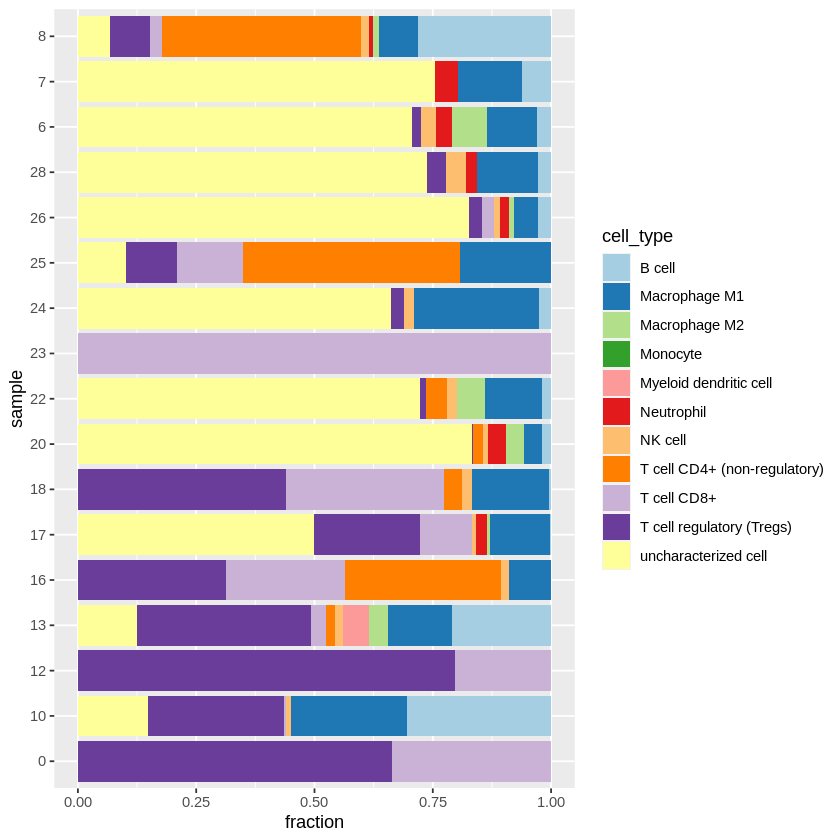

In [16]:
# QuanTIseq generates scores that can be interpreted as a cell-type fraction. Let’s visualize the results as a stacked bar chart with tidyverse/ggplot2.

quantiseq_res %>%
  gather(sample, fraction, -cell_type) %>%
  # plot as stacked bar chart
  ggplot(aes(x = sample, y = fraction, fill = cell_type)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  scale_fill_brewer(palette = "Paired") +
  scale_x_discrete(limits = rev(levels(quantiseq_res)))

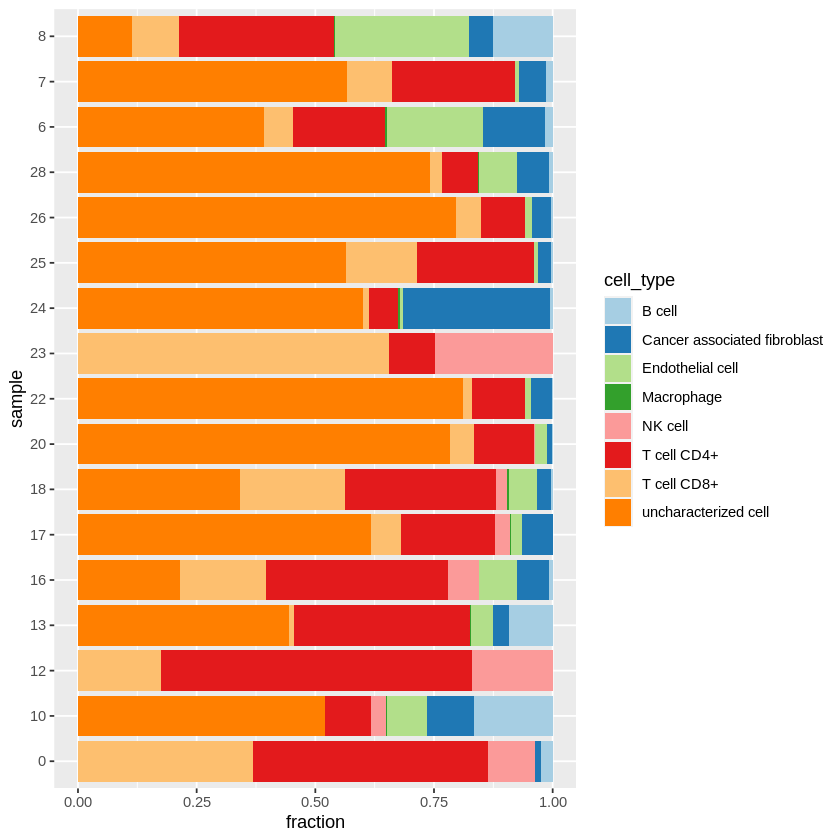

In [18]:
epic_res %>%
  gather(sample, fraction, -cell_type) %>%
  # plot as stacked bar chart
  ggplot(aes(x = sample, y = fraction, fill = cell_type)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  scale_fill_brewer(palette = "Paired") +
  scale_x_discrete(limits = rev(levels(epic_res)))

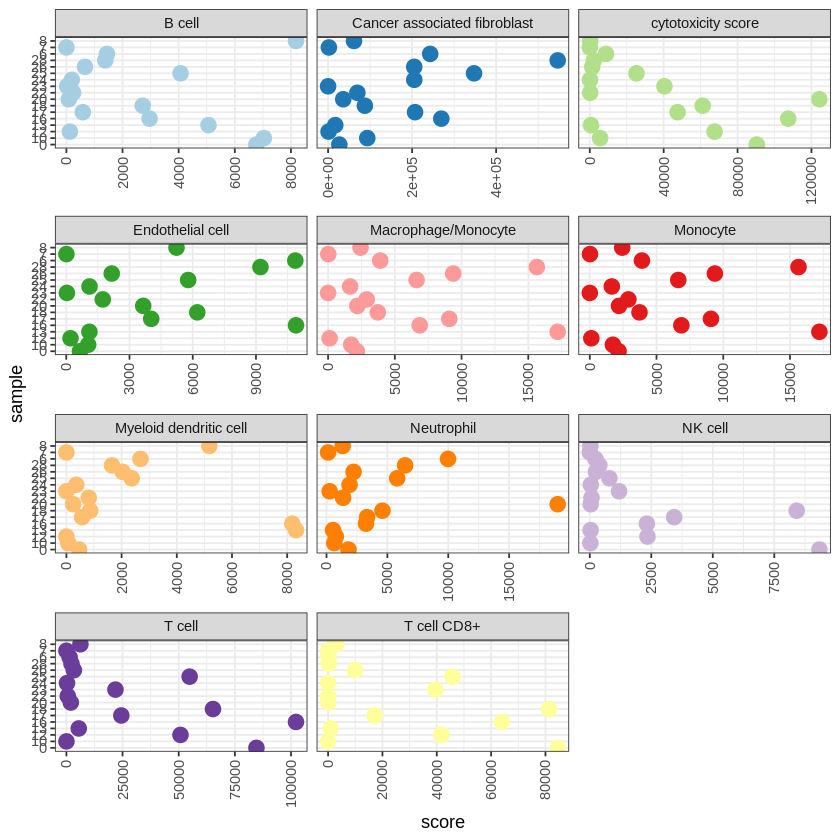

In [21]:
mcp_counter_res %>%
  gather(sample, score, -cell_type) %>%
  ggplot(aes(x = sample, y = score, color = cell_type)) +
  geom_point(size = 4) +
  facet_wrap(~cell_type, scales = "free_x", ncol = 3) +
  scale_color_brewer(palette = "Paired", guide = "none") +
  coord_flip() +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))

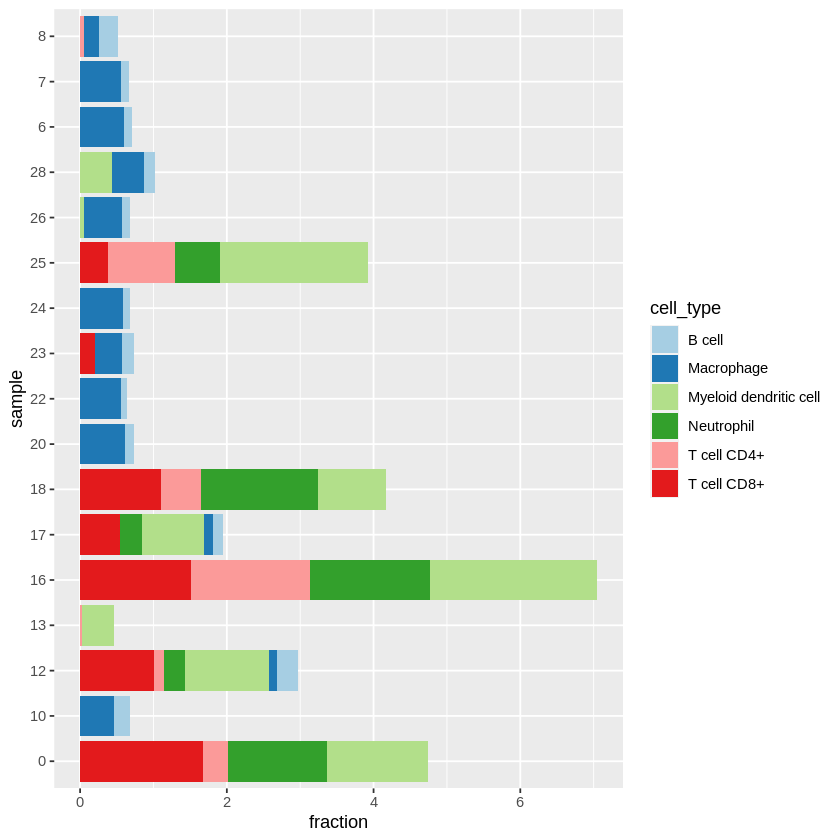

In [27]:
timer_res %>%
  gather(sample, fraction, -cell_type) %>%
  # plot as stacked bar chart
  ggplot(aes(x = sample, y = fraction, fill = cell_type)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  scale_fill_brewer(palette = "Paired") +
  scale_x_discrete(limits = rev(levels(timer_res)))